In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime
import os

%load_ext autotime
%matplotlib inline

AQ_FILE = "Measurement_summary.csv"
WX_FILE = "Seoul_SSRD_Temp.nc"

diri = %pwd
diri

'C:\\Users\\jimpg\\OneDrive\\Documents\\APWS'

## Air Pollution Data

In [2]:
# Read City Hourly Air Pollutant Data to a dataframe
aq_path = os.path.join("raw_data", AQ_FILE)
df = pd.read_csv(aq_path, na_values=-1)
df

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
647506,2019-12-31 19:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0
647507,2019-12-31 20:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0
647508,2019-12-31 21:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0
647509,2019-12-31 22:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0


time: 714 ms


In [3]:
# Starting with a single weather station, will expand to include others later
df = df.loc[df["Station code"] == 101]
df

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
25900,2019-12-31 19:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.026,0.014,0.5,26.0,19.0
25901,2019-12-31 20:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.024,0.014,0.4,27.0,19.0
25902,2019-12-31 21:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.014,0.021,0.4,23.0,18.0
25903,2019-12-31 22:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.022,0.014,0.5,20.0,19.0


time: 17 ms


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25905 entries, 0 to 25904
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Measurement date  25905 non-null  object 
 1   Station code      25905 non-null  int64  
 2   Address           25905 non-null  object 
 3   Latitude          25905 non-null  float64
 4   Longitude         25905 non-null  float64
 5   SO2               25877 non-null  float64
 6   NO2               25877 non-null  float64
 7   O3                25877 non-null  float64
 8   CO                25877 non-null  float64
 9   PM10              25875 non-null  float64
 10  PM2.5             25863 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.4+ MB
time: 7 ms


In [5]:
df.describe()

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
count,25905.0,2.590500e+04,2.590500e+04,25877.000000,25877.000000,25877.000000,25877.000000,25875.000000,25863.000000
mean,101.0,3.757202e+01,1.270050e+02,0.004386,0.031631,0.024625,0.585477,38.010783,22.889185
std,0.0,2.133801e-11,5.052056e-11,0.004814,0.016605,0.019112,0.478374,27.411757,19.998326
min,101.0,3.757202e+01,1.270050e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.0,3.757202e+01,1.270050e+02,0.003000,0.019000,0.009000,0.400000,21.000000,11.000000
50%,101.0,3.757202e+01,1.270050e+02,0.004000,0.028000,0.022000,0.500000,32.000000,18.000000
75%,101.0,3.757202e+01,1.270050e+02,0.005000,0.042000,0.035000,0.700000,48.000000,29.000000
max,101.0,3.757202e+01,1.270050e+02,0.406000,0.109000,0.325000,40.000000,516.000000,513.000000


time: 21 ms


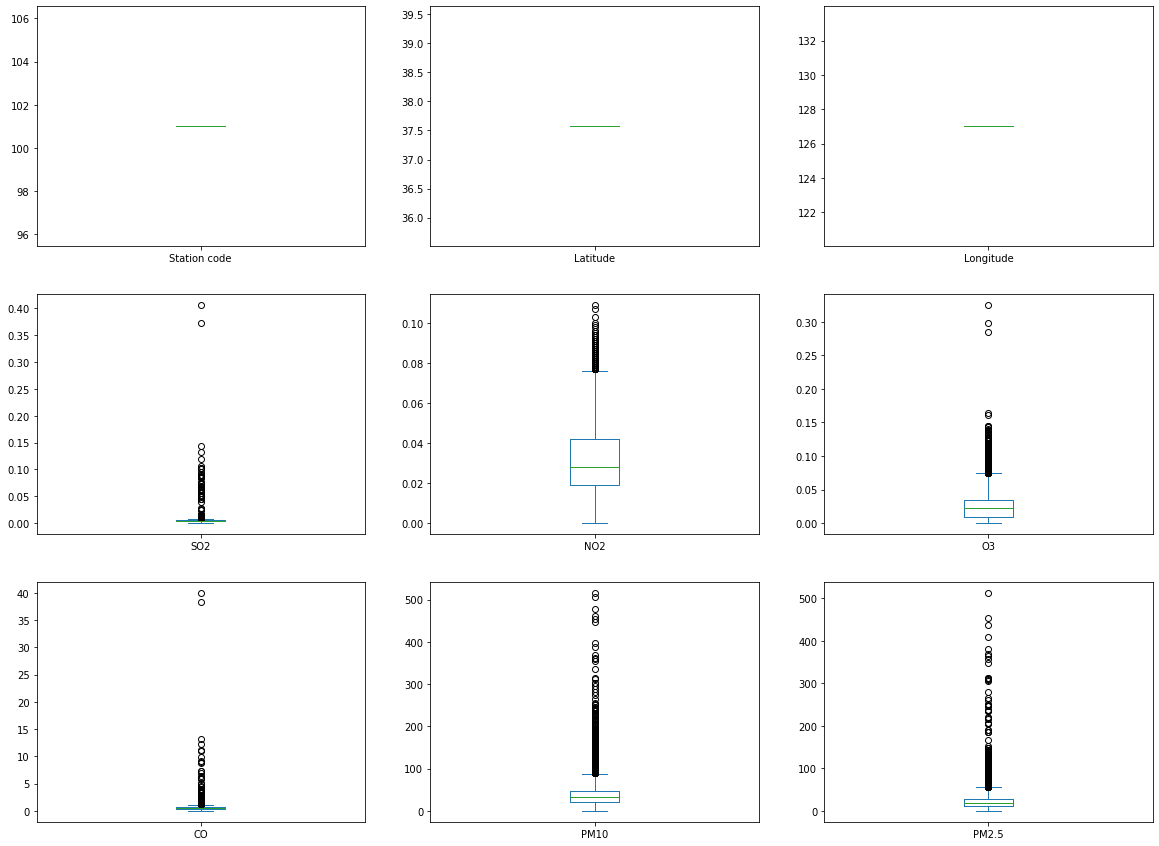

time: 482 ms


In [6]:
df.plot(kind="box", subplots=True, layout=(3,3), figsize=(20,15))
plt.show()

array([[<AxesSubplot:title={'center':'Station code'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'SO2'}>,
        <AxesSubplot:title={'center':'NO2'}>,
        <AxesSubplot:title={'center':'O3'}>],
       [<AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'PM2.5'}>]], dtype=object)

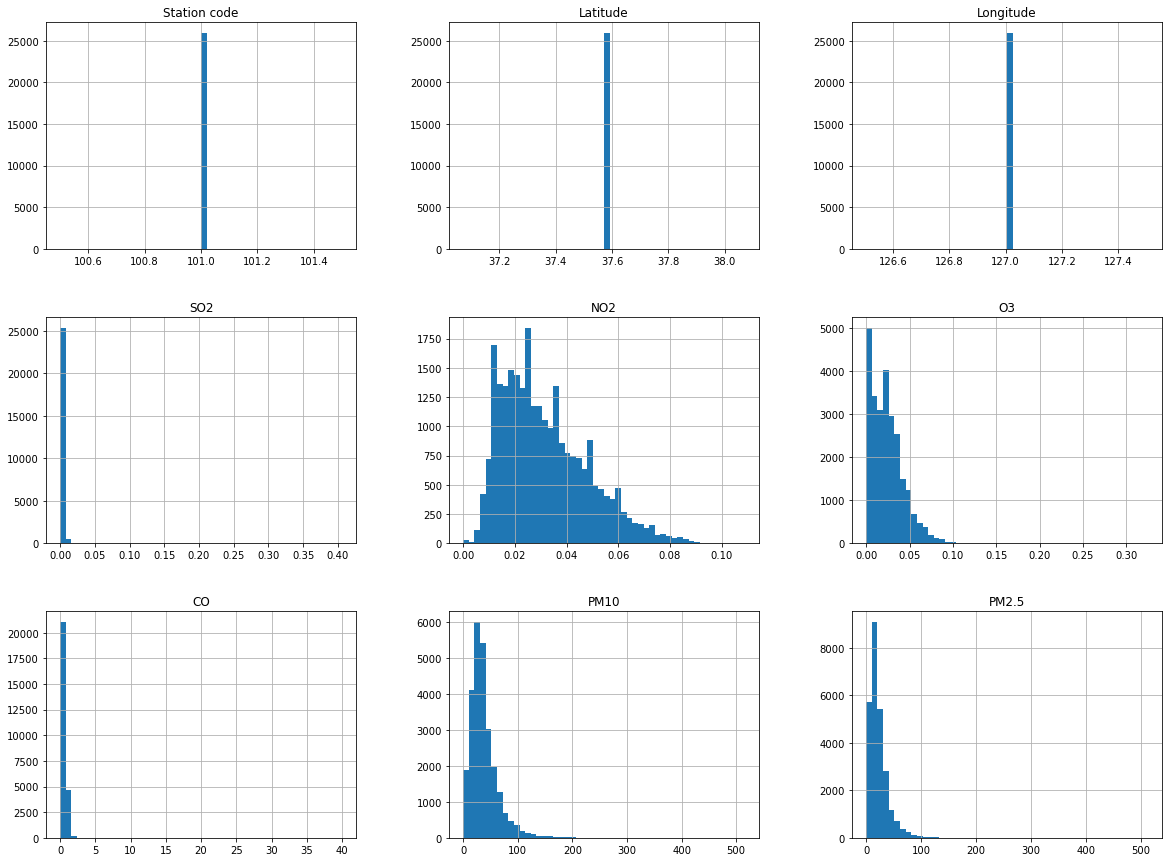

time: 977 ms


In [7]:
df.hist(bins=50, figsize=(20, 15))

In [8]:
correlations = df[["SO2", "NO2", "O3", "CO", "PM10", "PM2.5"]].corr()
correlations

,SO2,NO2,O3,CO,PM10,PM2.5
SO2,1.000000,0.108773,0.031632,0.832245,0.232570,0.253186
NO2,0.108773,1.000000,-0.447690,0.411354,0.427445,0.447467
O3,0.031632,-0.447690,1.000000,-0.197642,0.031712,-0.018043
CO,0.832245,0.411354,-0.197642,1.000000,0.336529,0.388458
PM10,0.232570,0.427445,0.031712,0.336529,1.000000,0.837464
PM2.5,0.253186,0.447467,-0.018043,0.388458,0.837464,1.000000


time: 8.66 ms


<AxesSubplot:>

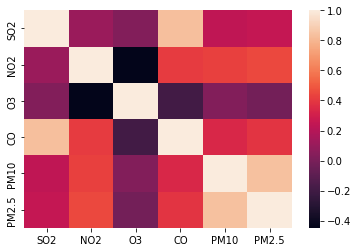

time: 434 ms


In [9]:
import seaborn as sns
sns.heatmap(correlations)

In [10]:
correlations["O3"].sort_values(ascending = False)

O3       1.000000
PM10     0.031712
SO2      0.031632
PM2.5   -0.018043
CO      -0.197642
NO2     -0.447690
Name: O3, dtype: float64

time: 2 ms


In [11]:
df.isnull().sum()

Measurement date     0
Station code         0
Address              0
Latitude             0
Longitude            0
SO2                 28
NO2                 28
O3                  28
CO                  28
PM10                30
PM2.5               42
dtype: int64

time: 5 ms


Text(0.5, 1.0, 'CO')

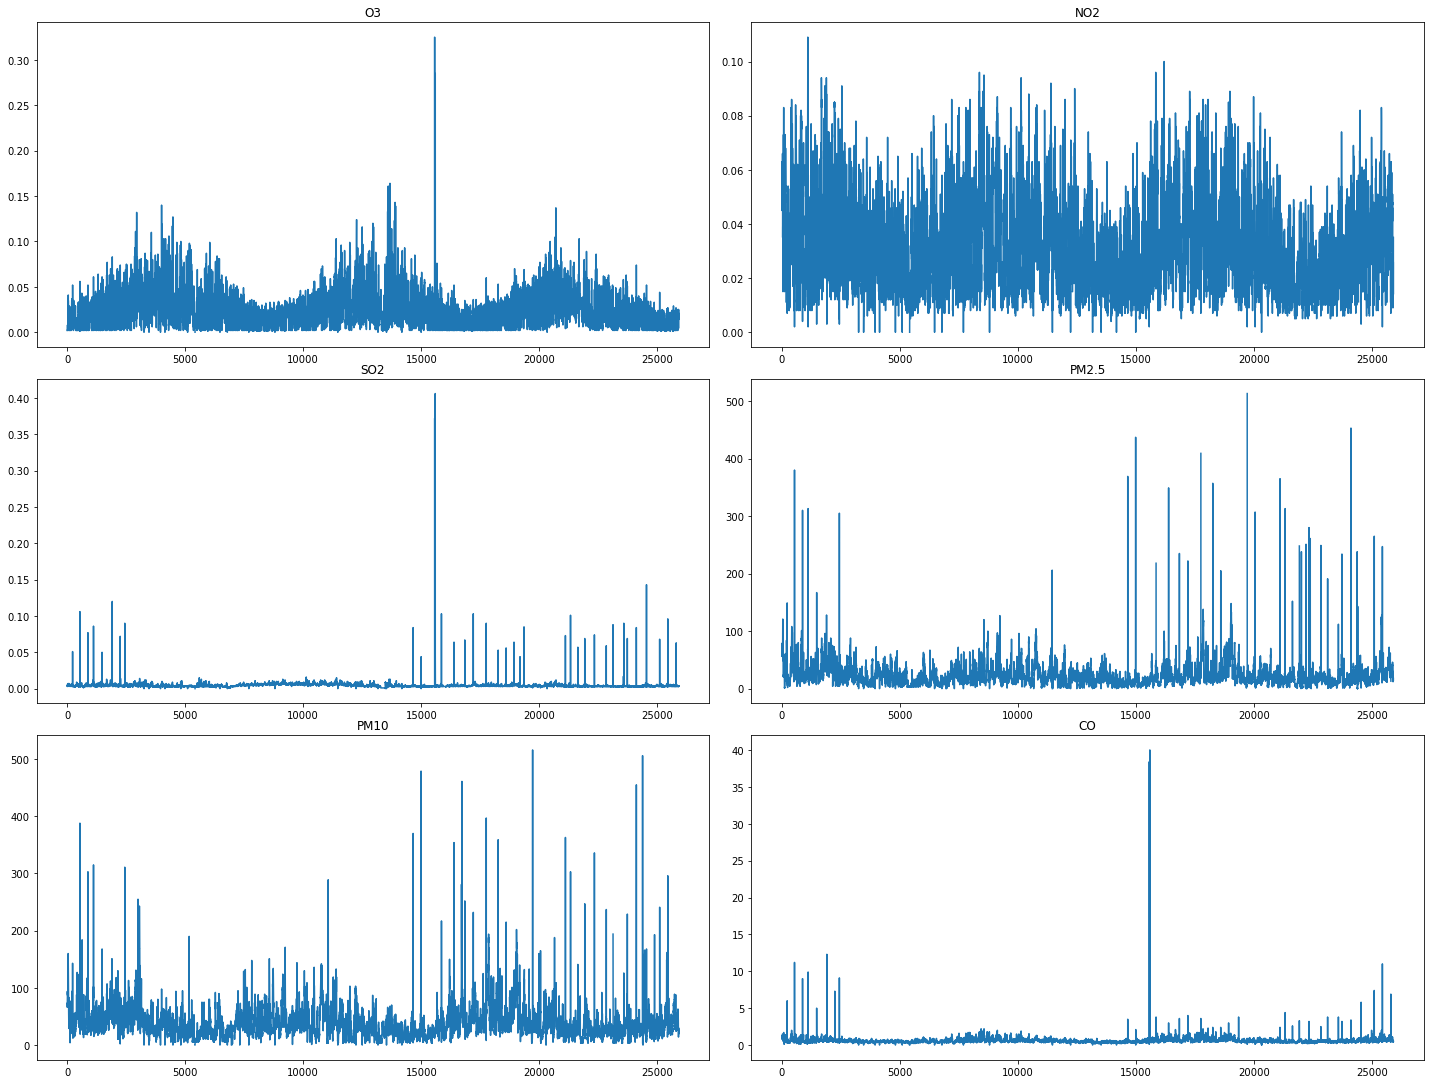

time: 468 ms


In [12]:
fig, ax = plt.subplots(3, 2, figsize=(20,15))
fig.tight_layout()

ax[0,0].plot(df["O3"])
ax[0,0].set_title("O3")

ax[1,0].plot(df["SO2"])
ax[1,0].set_title("SO2")

ax[2,0].plot(df["PM10"])
ax[2,0].set_title("PM10")

ax[0,1].plot(df["NO2"])
ax[0,1].set_title("NO2")

ax[1,1].plot(df["PM2.5"])
ax[1,1].set_title("PM2.5")

ax[2,1].plot(df["CO"])
ax[2,1].set_title("CO")

In [13]:
# function to apply to remove outliers
def replace_outliers(x, upper, lower):
    if (x > upper) or (x < lower):
        x = math.nan
    return x
    
# Replace extreme outliers with NaN so that they can be interpolated
for col in df[["SO2", "NO2", "O3", "CO", "PM10", "PM2.5"]]:
    # quantiles
    q25, q75 = df[col].quantile(0.25), df[col].quantile(0.75)
    iqr = q75 - q25
    print(f"{col} Percentiles: 25th: {q25}, 75th: {q75}, IQR: {iqr}")
    
    # calculate the outlier cutoff
    # Extreme tolerance, only want to cut out instrument errors
    cut_off = iqr * 3
    lower, upper = q25 - cut_off, q75 + cut_off
    
    # identify outliers
    outliers = [x for x in df[col] if x < lower or x > upper]
    print(f"Number Outlier: {len(outliers)}")

    df[col] = df[col].apply(lambda x : replace_outliers(x, upper, lower))

df.isnull().sum()

SO2 Percentiles: 25th: 0.003, 75th: 0.005, IQR: 0.002
Number Outlier: 103
NO2 Percentiles: 25th: 0.019, 75th: 0.042, IQR: 0.023000000000000003
Number Outlier: 0
O3 Percentiles: 25th: 0.009, 75th: 0.035, IQR: 0.026000000000000002
Number Outlier: 45
CO Percentiles: 25th: 0.4, 75th: 0.7, IQR: 0.29999999999999993
Number Outlier: 209
PM10 Percentiles: 25th: 21.0, 75th: 48.0, IQR: 27.0
Number Outlier: 315
PM2.5 Percentiles: 25th: 11.0, 75th: 29.0, IQR: 18.0
Number Outlier: 351


C:\Users\jimpg\AppData\Local\Temp/ipykernel_3576/1982709461.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x : replace_outliers(x, upper, lower))


Measurement date      0
Station code          0
Address               0
Latitude              0
Longitude             0
SO2                 131
NO2                  28
O3                   73
CO                  237
PM10                345
PM2.5               393
dtype: int64

time: 82 ms


In [14]:
# Replace missing values with nearest values
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html 
df_interp = df.interpolate(method='nearest')

time: 7 ms


Text(0.5, 1.0, 'CO')

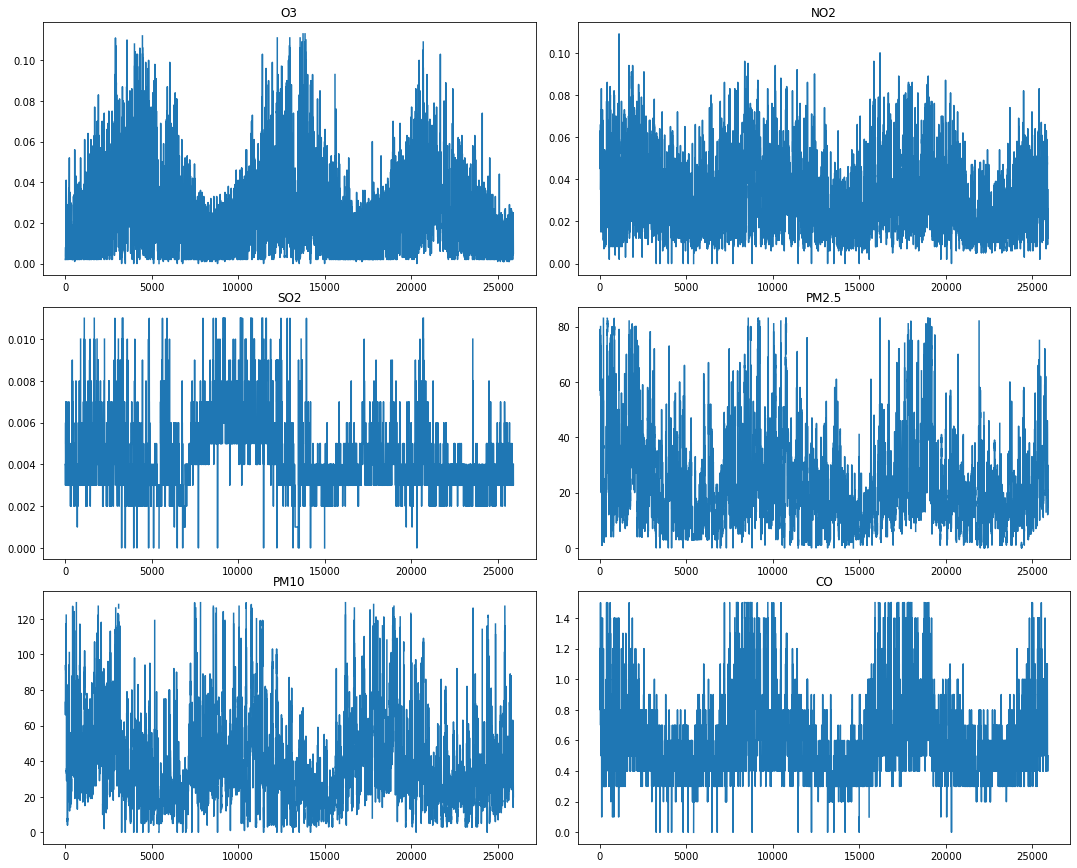

time: 450 ms


In [15]:
# Plot non-interpolated datasets
fig, ax = plt.subplots(3, 2, figsize=(15,12))
fig.tight_layout()

ax[0,0].plot(df["O3"])
ax[0,0].set_title("O3")

ax[1,0].plot(df["SO2"])
ax[1,0].set_title("SO2")

ax[2,0].plot(df["PM10"])
ax[2,0].set_title("PM10")

ax[0,1].plot(df["NO2"])
ax[0,1].set_title("NO2")

ax[1,1].plot(df["PM2.5"])
ax[1,1].set_title("PM2.5")

ax[2,1].plot(df["CO"])
ax[2,1].set_title("CO")

Text(0.5, 1.0, 'CO')

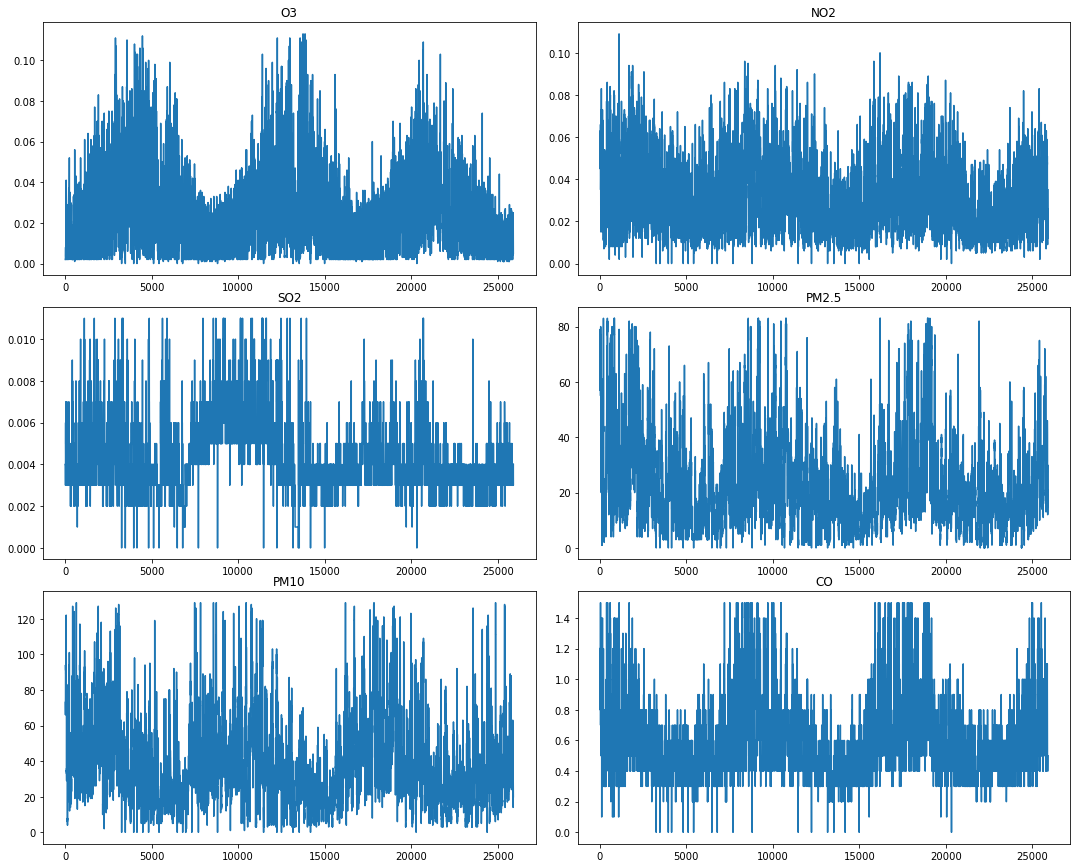

time: 465 ms


In [16]:
# Plot interpolated datasets
fig, ax = plt.subplots(3, 2, figsize=(15,12))
fig.tight_layout()

ax[0,0].plot(df_interp["O3"])
ax[0,0].set_title("O3")

ax[1,0].plot(df_interp["SO2"])
ax[1,0].set_title("SO2")

ax[2,0].plot(df_interp["PM10"])
ax[2,0].set_title("PM10")

ax[0,1].plot(df_interp["NO2"])
ax[0,1].set_title("NO2")

ax[1,1].plot(df_interp["PM2.5"])
ax[1,1].set_title("PM2.5")

ax[2,1].plot(df_interp["CO"])
ax[2,1].set_title("CO")

## Weather Data

In [47]:
# Read in NetCFD file into a usable dataset
wx_path = os.path.join("raw_data", WX_FILE)
xr_dset = xr.open_dataset(wx_path)
xr_dset

<xarray.Dataset>
Dimensions:    (longitude: 1, latitude: 1, time: 26280)
Coordinates:
  * longitude  (longitude) float32 127.0
  * latitude   (latitude) float32 37.4
  * time       (time) datetime64[ns] 2017-01-01 ... 2019-12-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    ssrd       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-25 18:04:57 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

time: 9.11 ms


In [48]:
# Column names in NetCFD
LATITUDE_NAME = "latitude"
LONGITUDE_NAME = "longitude"
TIME_NAME = "time"
TEMP_NAME = "t2m"
RAD_NAME = "ssrd"

target_lat = 37.25
target_lon = 127.0

dataset_lats = xr_dset[LATITUDE_NAME]
dataset_lons = xr_dset[LONGITUDE_NAME]

lat = xr_dset[LATITUDE_NAME][(abs(dataset_lats - target_lat)).argmin()]
lon = xr_dset[LONGITUDE_NAME][(abs(dataset_lons - target_lon)).argmin()]

wx_seoul = pd.DataFrame()

# Radiation reported in Joules/m^2/hour --> divide by seconds/hour to get Watts/m^2 instantaneous
wx_seoul[TIME_NAME] = xr_dset[TIME_NAME]
wx_seoul[TEMP_NAME] = xr_dset[TEMP_NAME].sel(latitude=lat, longitude=lon)
wx_seoul[RAD_NAME] =  xr_dset[RAD_NAME].sel(latitude=lat, longitude=lon) / 3600

wx_seoul.describe()

,t2m,ssrd
count,26280.000000,26280.000000
mean,285.694855,177.855637
std,11.064434,252.891434
min,256.336426,0.000000
25%,276.293747,0.000000
50%,286.576889,7.394653
75%,295.203789,325.470474
max,311.307129,982.951111


time: 15.1 ms


In [49]:
wx_seoul

,time,t2m,ssrd
0,2017-01-01 00:00:00,272.008179,61.362255
1,2017-01-01 01:00:00,272.254791,171.832321
2,2017-01-01 02:00:00,277.652618,299.281647
3,2017-01-01 03:00:00,278.540100,390.387573
4,2017-01-01 04:00:00,278.695282,378.793091
...,...,...,...
26275,2019-12-31 19:00:00,267.612732,0.000000
26276,2019-12-31 20:00:00,268.241852,0.000000
26277,2019-12-31 21:00:00,268.468353,0.000000
26278,2019-12-31 22:00:00,268.897827,0.000000


time: 6 ms


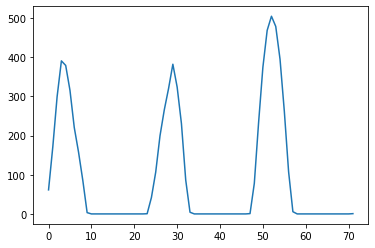

time: 68.9 ms


In [50]:
# Double check that the radiation data makes intuitive sense
plt.plot(wx_seoul[RAD_NAME][0:72])

In [51]:
# change measurement date in air pollution data to a datetime object, remove missing timestamps
times = pd.date_range(start="2017-01-01 00:00", end="2019-12-31 23:00", freq="H")
times

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2019-12-31 14:00:00', '2019-12-31 15:00:00',
               '2019-12-31 16:00:00', '2019-12-31 17:00:00',
               '2019-12-31 18:00:00', '2019-12-31 19:00:00',
               '2019-12-31 20:00:00', '2019-12-31 21:00:00',
               '2019-12-31 22:00:00', '2019-12-31 23:00:00'],
              dtype='datetime64[ns]', length=26280, freq='H')

time: 1.08 ms


In [52]:
# df_interp = df_interp.set_index("Measurement date")
df_interp.index = pd.to_datetime(df_interp.index)

KeyError: "None of ['Measurement date'] are in the columns"

time: 6 ms


In [53]:
differences = times.difference(df_interp.index)
differences

DatetimeIndex(['2019-01-01 00:00:00', '2019-03-08 21:00:00',
               '2019-03-08 22:00:00', '2019-03-08 23:00:00',
               '2019-03-09 00:00:00', '2019-03-09 01:00:00',
               '2019-03-09 02:00:00', '2019-03-09 03:00:00',
               '2019-03-09 04:00:00', '2019-03-09 05:00:00',
               ...
               '2019-12-01 17:00:00', '2019-12-01 18:00:00',
               '2019-12-01 19:00:00', '2019-12-01 20:00:00',
               '2019-12-01 21:00:00', '2019-12-01 22:00:00',
               '2019-12-01 23:00:00', '2019-12-02 00:00:00',
               '2019-12-02 01:00:00', '2019-12-02 02:00:00'],
              dtype='datetime64[ns]', length=375, freq=None)

time: 5 ms


In [60]:
wx_seoul = wx_seoul.set_index("time")
for date in differences:
    wx_seoul = wx_seoul.loc[wx_seoul.index != date]

wx_seoul

,t2m,ssrd
time,,
2017-01-01 00:00:00,272.008179,61.362255
2017-01-01 01:00:00,272.254791,171.832321
2017-01-01 02:00:00,277.652618,299.281647
2017-01-01 03:00:00,278.540100,390.387573
2017-01-01 04:00:00,278.695282,378.793091
...,...,...
2019-12-31 19:00:00,267.612732,0.000000
2019-12-31 20:00:00,268.241852,0.000000
2019-12-31 21:00:00,268.468353,0.000000


time: 147 ms


In [61]:
df_interp.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2019-12-31 14:00:00', '2019-12-31 15:00:00',
               '2019-12-31 16:00:00', '2019-12-31 17:00:00',
               '2019-12-31 18:00:00', '2019-12-31 19:00:00',
               '2019-12-31 20:00:00', '2019-12-31 21:00:00',
               '2019-12-31 22:00:00', '2019-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Measurement date', length=25905, freq=None)

time: 2 ms


In [62]:
wx_seoul.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2019-12-31 14:00:00', '2019-12-31 15:00:00',
               '2019-12-31 16:00:00', '2019-12-31 17:00:00',
               '2019-12-31 18:00:00', '2019-12-31 19:00:00',
               '2019-12-31 20:00:00', '2019-12-31 21:00:00',
               '2019-12-31 22:00:00', '2019-12-31 23:00:00'],
              dtype='datetime64[ns]', name='time', length=25905, freq=None)

time: 3 ms


In [71]:
data = pd.concat([wx_seoul, df_interp], axis=1)
data = data.drop(["Station code", "Address", "Latitude", "Longitude"], axis=1)
data.rename(columns = {'t2m':'Temperature (K)', 'ssrd':'Radiation'}, inplace = True)
data

,Temperature (K),Radiation,SO2,NO2,O3,CO,PM10,PM2.5
2017-01-01 00:00:00,272.008179,61.362255,0.004,0.059,0.002,1.2,73.0,57.0
2017-01-01 01:00:00,272.254791,171.832321,0.004,0.058,0.002,1.2,71.0,59.0
2017-01-01 02:00:00,277.652618,299.281647,0.004,0.056,0.002,1.2,70.0,59.0
2017-01-01 03:00:00,278.540100,390.387573,0.004,0.056,0.002,1.2,70.0,58.0
2017-01-01 04:00:00,278.695282,378.793091,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,267.612732,0.000000,0.003,0.026,0.014,0.5,26.0,19.0
2019-12-31 20:00:00,268.241852,0.000000,0.003,0.024,0.014,0.4,27.0,19.0
2019-12-31 21:00:00,268.468353,0.000000,0.003,0.014,0.021,0.4,23.0,18.0
2019-12-31 22:00:00,268.897827,0.000000,0.003,0.022,0.014,0.5,20.0,19.0


time: 24.5 ms


In [72]:
data.to_csv("processed_data/cleaned_data.csv")

time: 98.7 ms
